# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


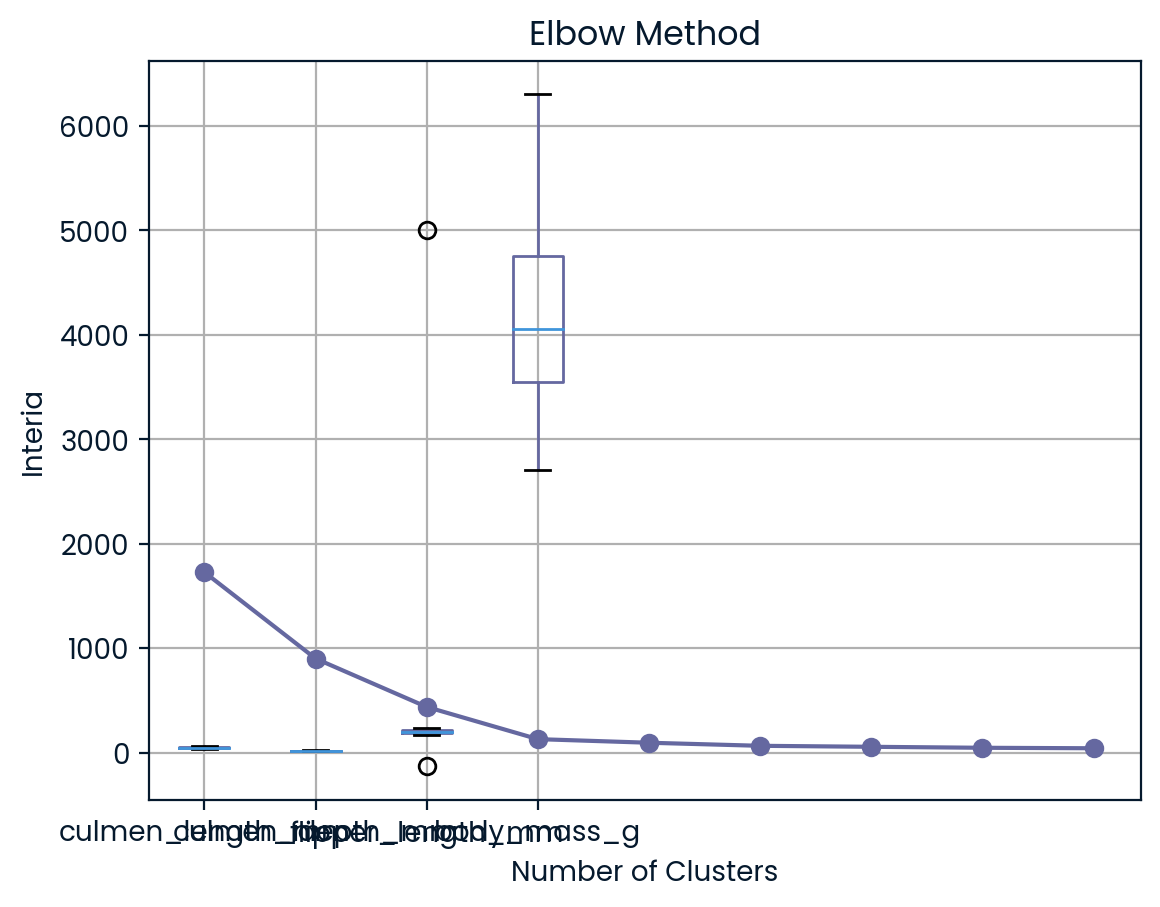

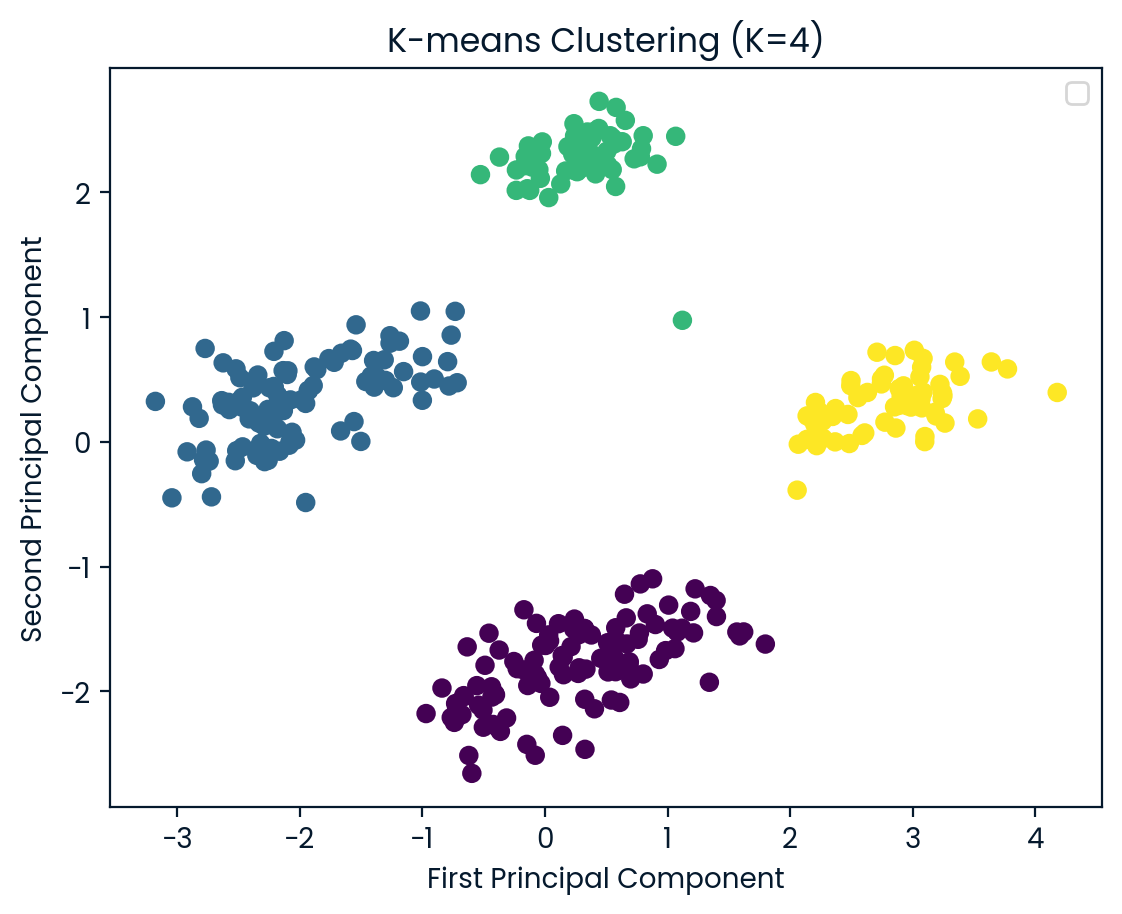

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,45.545763,14.262712,212.779661,4683.050847
3,49.473770,15.718033,221.540984,5484.836066


In [4]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1 - Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()
penguins_df.info()

# Step 2 - Dealing with null values and outliers
penguins_df.boxplot()

penguins_clean=penguins_df.dropna()
penguins_clean[penguins_clean["flipper_length_mm"]>4000]
penguins_clean[penguins_clean["flipper_length_mm"]>0]
penguins_clean=penguins_clean.drop([9,14])

# Step 3 - Perform preprocessing steps on the dataset to create dummy variables
df=pd.get_dummies(penguins_clean).drop("sex_.",axis=1)

# Step 4 - Perform preprocessing steps on the dataset - scaling
s=StandardScaler()
x=s.fit_transform(df)
penguins_preprocessed=pd.DataFrame(data=x,columns=df.columns)
penguins_preprocessed.head(10)

# Step 5 - Perform PCA
pca=PCA(n_components=None)
xf=pca.fit(penguins_preprocessed)
v=xf.explained_variance_ratio_
n_components=sum(v>0.1)
pca=PCA(n_components=n_components)
penguins_PCA=pca.fit_transform(penguins_preprocessed)

# Step 6 - Detect the optimal number of clusters for k-means clustering
inertia=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10),inertia,marker='o')  
plt.xlabel('Number of Clusters')
plt.ylabel('Interia')
plt.title('Elbow Method')
plt.show()
n_clusters=4

# Step 7 - Run the k-means clustering algorithm
# with the optimal number of clusters 
# and visualize the resulting clusters.
kmeans=KMeans(n_clusters=n_clusters,random_state=42).fit(penguins_PCA)  
plt.scatter(penguins_PCA[:,0],penguins_PCA[:,1],c=kmeans.labels_)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

# Step 8 - Create a final statistical DataFrame for each cluster.
penguins_clean["label"]=kmeans.labels_
numeric_columns = penguins_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
stat_penguins=penguins_clean.groupby('label')[numeric_columns].mean()
stat_penguins
